<a href="https://colab.research.google.com/github/JackyXu866/Project-in-ML-AI/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - RNN
Dataset: https://www.kaggle.com/datasets/psycon/bitcoin-usdt-2017202204-historical-dataset 

I would like to know the trend of bitcoin in the future

## Part 1 - Implement

### Import

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/btc-usdt.csv')

### EDA

In [ ]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2019-07-30 00:00:00.000000000,9509.07,9535.00,9503.07,9517.75,381.293856,2019-07-30 00:29:59.999000064,3.631211e+06,3492,216.528742,2.062189e+06,0
1,2019-07-30 00:30:00.000000000,9517.03,9539.00,9507.00,9532.58,258.514869,2019-07-30 00:59:59.999000064,2.462134e+06,3133,141.887550,1.351182e+06,0
2,2019-07-30 01:00:00.000000000,9533.59,9534.00,9500.00,9500.25,275.797270,2019-07-30 01:29:59.999000064,2.624322e+06,3583,114.238457,1.087402e+06,0
3,2019-07-30 01:30:00.000000000,9500.25,9514.46,9460.71,9465.25,485.218470,2019-07-30 01:59:59.999000064,4.604004e+06,5330,225.681291,2.141459e+06,0
4,2019-07-30 02:00:00.000000000,9465.25,9488.94,9430.01,9460.42,498.669626,2019-07-30 02:29:59.999000064,4.717269e+06,6197,228.535910,2.162163e+06,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55382 entries, 0 to 55381
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open Time           55382 non-null  object 
 1   Open                55382 non-null  float64
 2   High                55382 non-null  float64
 3   Low                 55382 non-null  float64
 4   Close               55382 non-null  float64
 5   Volume              55382 non-null  float64
 6   Close Time          55382 non-null  object 
 7   Quote Asset Volume  55382 non-null  float64
 8   Number of Trades    55382 non-null  int64  
 9   TB Base Volume      55382 non-null  float64
 10  TB Quote Volume     55382 non-null  float64
 11  Ignore              55382 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 5.1+ MB


In [ ]:
df.shape

(55382, 12)

In [ ]:
df.isnull().sum()

Open Time             0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close Time            0
Quote Asset Volume    0
Number of Trades      0
TB Base Volume        0
TB Quote Volume       0
Ignore                0
dtype: int64

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
count,55382.000000,55382.00000,55382.000000,55382.000000,55382.000000,5.538200e+04,55382.000000,55382.000000,5.538200e+04,55382.0
mean,27078.813587,27185.77378,26966.475610,27078.982988,1579.114365,4.081011e+07,31197.703730,778.687119,2.013084e+07,0.0
std,17839.585463,17913.22781,17762.200793,17839.460704,1816.713059,4.957040e+07,34157.700119,902.016916,2.456981e+07,0.0
min,4131.230000,4258.53000,3782.130000,4130.640000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0
25%,9718.515000,9742.96250,9684.062500,9718.702500,629.812325,9.585103e+06,11501.250000,308.330359,4.661086e+06,0.0
50%,21747.490000,21846.32500,21659.630000,21747.475000,1023.727193,2.517800e+07,20332.500000,500.166608,1.230260e+07,0.0
75%,42236.362500,42389.46500,42107.057500,42236.362500,1797.494066,5.425812e+07,36782.000000,887.614656,2.672589e+07,0.0
max,68635.120000,69000.00000,68462.960000,68633.690000,74378.715690,1.625288e+09,594885.000000,37099.582260,8.106535e+08,0.0


In [ ]:
# ignore seems to be all 0, drop
df = df.drop("Ignore", axis=1)

In [ ]:
df.describe(include=['O'])
# since freq is one, so every time stamp is unique

,Open Time,Close Time
count,55382,55382
unique,55382,55382
top,2019-07-30 00:00:00.000000000,2019-07-30 00:29:59.999000064
freq,1,1


In [ ]:
df['Open Time'] = pd.to_datetime(df['Open Time'], format='%Y-%m-%d %H:%M:%S')
df['Close Time'] = pd.to_datetime(df['Close Time'], format='%Y-%m-%d %H:%M:%S')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55382 entries, 0 to 55381
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           55382 non-null  datetime64[ns]
 1   Open                55382 non-null  float64       
 2   High                55382 non-null  float64       
 3   Low                 55382 non-null  float64       
 4   Close               55382 non-null  float64       
 5   Volume              55382 non-null  float64       
 6   Close Time          55382 non-null  datetime64[ns]
 7   Quote Asset Volume  55382 non-null  float64       
 8   Number of Trades    55382 non-null  int64         
 9   TB Base Volume      55382 non-null  float64       
 10  TB Quote Volume     55382 non-null  float64       
dtypes: datetime64[ns](2), float64(8), int64(1)
memory usage: 4.6 MB


In [ ]:
time_diff = df['Close Time'] - df['Open Time']

In [ ]:
time_diff

0       0 days 00:29:59.999000064
1       0 days 00:29:59.999000064
2       0 days 00:29:59.999000064
3       0 days 00:29:59.999000064
4       0 days 00:29:59.999000064
                   ...           
55377   0 days 00:29:59.999000064
55378   0 days 00:29:59.999000064
55379   0 days 00:29:59.999000064
55380   0 days 00:29:59.999000064
55381   0 days 00:29:59.999000064
Length: 55382, dtype: timedelta64[ns]

In [ ]:
time_diff.describe()

count                        55382
mean     0 days 00:29:59.897627578
std      0 days 00:00:11.496277330
min      0 days 00:00:58.145999872
25%      0 days 00:29:59.999000064
50%      0 days 00:29:59.999000064
75%      0 days 00:29:59.999000064
max      0 days 00:29:59.999000064
dtype: object

In [ ]:
time_diff.value_counts()

0 days 00:29:59.999000064    55375
0 days 00:05:32.286000128        1
0 days 00:21:46.694000128        1
0 days 00:17:20.520999936        1
0 days 00:10:54.772999936        1
0 days 00:00:58.145999872        1
0 days 00:29:59                  1
0 days 00:29:54.361999872        1
dtype: int64

In [ ]:
# close time is mostly related with open time, so it could be drop
df = df.drop(['Close Time'], axis=1)

In [ ]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
0,2019-07-30 00:00:00,9509.07,9535.00,9503.07,9517.75,381.293856,3.631211e+06,3492,216.528742,2.062189e+06
1,2019-07-30 00:30:00,9517.03,9539.00,9507.00,9532.58,258.514869,2.462134e+06,3133,141.887550,1.351182e+06
2,2019-07-30 01:00:00,9533.59,9534.00,9500.00,9500.25,275.797270,2.624322e+06,3583,114.238457,1.087402e+06
3,2019-07-30 01:30:00,9500.25,9514.46,9460.71,9465.25,485.218470,4.604004e+06,5330,225.681291,2.141459e+06
4,2019-07-30 02:00:00,9465.25,9488.94,9430.01,9460.42,498.669626,4.717269e+06,6197,228.535910,2.162163e+06


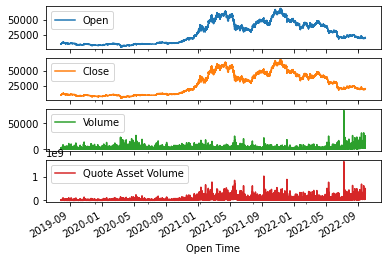

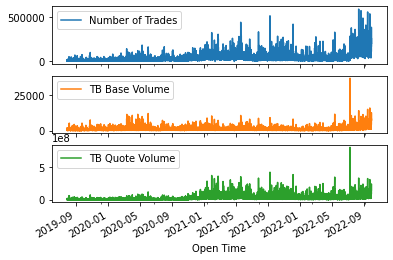

In [ ]:
# plot
plot_cols = ['Open', 'Close', 'Volume', 'Quote Asset Volume']
plot_features = df[plot_cols]
plot_features.index = df['Open Time']
_ = plot_features.plot(subplots=True)

plot_cols2 = ['Number of Trades', 'TB Base Volume', 'TB Quote Volume']
plot_features2 = df[plot_cols2]
plot_features2.index = df['Open Time']
_ = plot_features2.plot(subplots=True)

In [ ]:
# df = df.drop(['Open Time'], axis=1)

In [ ]:
df['Open Time'] = df['Open Time'].view(int)

In [ ]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
0,1564444800000000000,9509.07,9535.00,9503.07,9517.75,381.293856,3.631211e+06,3492,216.528742,2.062189e+06
1,1564446600000000000,9517.03,9539.00,9507.00,9532.58,258.514869,2.462134e+06,3133,141.887550,1.351182e+06
2,1564448400000000000,9533.59,9534.00,9500.00,9500.25,275.797270,2.624322e+06,3583,114.238457,1.087402e+06
3,1564450200000000000,9500.25,9514.46,9460.71,9465.25,485.218470,4.604004e+06,5330,225.681291,2.141459e+06
4,1564452000000000000,9465.25,9488.94,9430.01,9460.42,498.669626,4.717269e+06,6197,228.535910,2.162163e+06


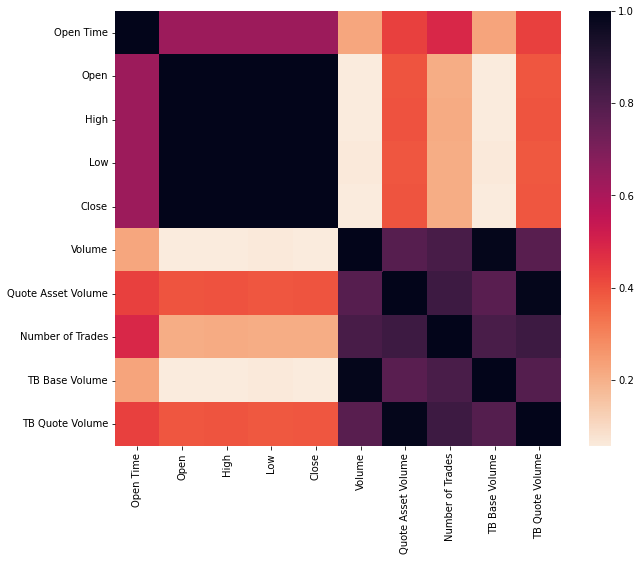

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

In [ ]:
df = df.drop("Volume", axis=1)
df = df.drop("TB Base Volume", axis=1)

### Split and Reshape

In [ ]:
df.shape

(55382, 8)

In [ ]:
df.head()

,Open Time,Open,High,Low,Close,Quote Asset Volume,Number of Trades,TB Quote Volume
0,1564444800000000000,9509.07,9535.00,9503.07,9517.75,3.631211e+06,3492,2.062189e+06
1,1564446600000000000,9517.03,9539.00,9507.00,9532.58,2.462134e+06,3133,1.351182e+06
2,1564448400000000000,9533.59,9534.00,9500.00,9500.25,2.624322e+06,3583,1.087402e+06
3,1564450200000000000,9500.25,9514.46,9460.71,9465.25,4.604004e+06,5330,2.141459e+06
4,1564452000000000000,9465.25,9488.94,9430.01,9460.42,4.717269e+06,6197,2.162163e+06


In [ ]:
df.set_index('Open Time')

,Open,High,Low,Close,Quote Asset Volume,Number of Trades,TB Quote Volume
Open Time,,,,,,,
1564444800000000000,9509.07,9535.00,9503.07,9517.75,3.631211e+06,3492,2.062189e+06
1564446600000000000,9517.03,9539.00,9507.00,9532.58,2.462134e+06,3133,1.351182e+06
1564448400000000000,9533.59,9534.00,9500.00,9500.25,2.624322e+06,3583,1.087402e+06
1564450200000000000,9500.25,9514.46,9460.71,9465.25,4.604004e+06,5330,2.141459e+06
1564452000000000000,9465.25,9488.94,9430.01,9460.42,4.717269e+06,6197,2.162163e+06
...,...,...,...,...,...,...,...
1664296200000000000,19492.21,19499.25,18918.77,19110.79,5.023024e+08,387906,2.436155e+08
1664298000000000000,19110.79,19115.89,18863.70,18951.06,3.591860e+08,296066,1.810139e+08
1664299800000000000,18951.06,19036.61,18863.01,18957.20,3.087666e+08,215243,1.575401e+08


In [ ]:
# split
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)].set_index('Open Time')
val_df = df[int(n*0.7):int(n*0.9)].set_index('Open Time')
test_df = df[int(n*0.9):].set_index('Open Time')

num_features = df.shape[1]

In [ ]:
# normalize
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

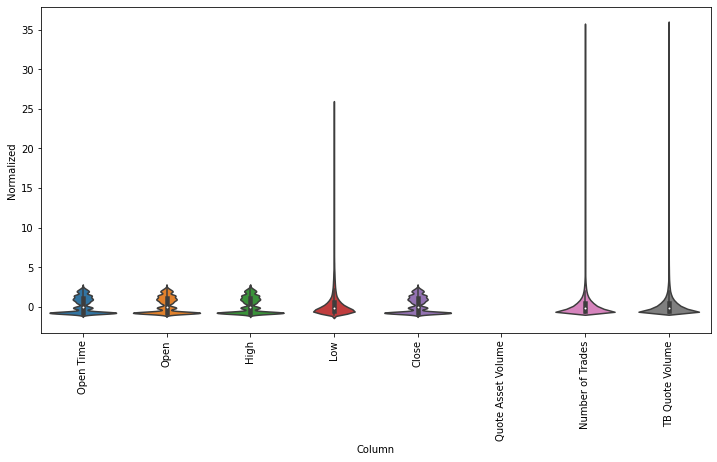

In [ ]:
# visualize
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
column_indices

{'Open Time': 0,
 'Open': 1,
 'High': 2,
 'Low': 3,
 'Close': 4,
 'Quote Asset Volume': 5,
 'Number of Trades': 6,
 'TB Quote Volume': 7}

#### Window Generator

https://www.tensorflow.org/tutorials/structured_data/time_series#data_windowing

It is the class given by tensorflow for data reshaping to fit into 
the RNN model

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
def plot(self, model=None, plot_col='Open', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()


WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      )

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

#### Use Window Generator

In [ ]:
train_df.head()

,Open,High,Low,Close,Quote Asset Volume,Number of Trades,TB Quote Volume
Open Time,,,,,,,
1564444800000000000,-0.747612,-0.748056,-0.745890,-0.747157,-0.677036,-0.930627,-0.660568
1564446600000000000,-0.747162,-0.747831,-0.745666,-0.746319,-0.703127,-0.946751,-0.692601
1564448400000000000,-0.746227,-0.748112,-0.746064,-0.748146,-0.699507,-0.926539,-0.704485
1564450200000000000,-0.748111,-0.749211,-0.748295,-0.750123,-0.655326,-0.848073,-0.656997
1564452000000000000,-0.750088,-0.750646,-0.750039,-0.750396,-0.652798,-0.809131,-0.656064


In [ ]:
# multiple step prediction
# a day has 48 half-hour, so predict next day based on the day before
w = WindowGenerator(input_width=48, label_width=48, shift=48, label_columns=['Open'],
          train_df=train_df, val_df=val_df, test_df=test_df)
w

Total window size: 96
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
Label column name(s): ['Open']

In [ ]:
# single step prediction
w2 = WindowGenerator(input_width=48, label_width=48, shift=1, label_columns=['Open'],
          train_df=train_df, val_df=val_df, test_df=test_df)
w2

Total window size: 49
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48]
Label column name(s): ['Open']

### Part 1 - RNN

For the RNN model, I just did a simple 1 layer model to test its 
original functionality without the interfarence of other layers. The 
activation for the RNN is the default tanh. 

There are two metrics that I used for evaluation. First is the loss
function, which I used MeanSquareError. Second is the Mean Absolute
Error.

Since we are working on the RNN model, so I also tried to do multiple
step prediction and compare with the single step prediction result.

In [ ]:
import tensorflow as tf

In [ ]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                            patience=patience,
                            mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
          optimizer=tf.keras.optimizers.Adam(),
          metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
              validation_data=window.val,
              callbacks=[early_stopping])
  return history

In [ ]:
def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss']) 
  plt.title('Model loss') 
  plt.ylabel('Loss') 
  plt.xlabel('Epoch') 
  plt.legend(['Train', 'Val'], loc='upper left') 
  plt.show()

  plt.plot(history.history['mean_absolute_error'])
  plt.plot(history.history['val_mean_absolute_error']) 
  plt.title('mean_absolute_error') 
  plt.ylabel('MSE') 
  plt.xlabel('Epoch') 
  plt.legend(['Train', 'Val'], loc='upper left') 
  plt.show()

In [ ]:
rnn_s = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
# define dictionary to store all the metrics for comparison
val_s = {}
val_m = {}
test_s = {}
test_m = {}

In [ ]:
# single step prediction
history = compile_and_fit(rnn_s, w2)

val_s['RNN'] = rnn_s.evaluate(w2.val)
test_s['RNN'] = rnn_s.evaluate(w2.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 10s 29ms/step - loss: 0.0719 - mean_absolute_error: 0.1260 - val_loss: 0.0113 - val_mean_absolute_error: 0.0703
Epoch 2/10
303/303 [==============================] - 8s 28ms/step - loss: 0.0030 - mean_absolute_error: 0.0303 - val_loss: 0.0038 - val_mean_absolute_error: 0.0393
Epoch 3/10
303/303 [==============================] - 8s 28ms/step - loss: 0.0015 - mean_absolute_error: 0.0211 - val_loss: 0.0025 - val_mean_absolute_error: 0.0303
Epoch 4/10
303/303 [==============================] - 10s 31ms/step - loss: 0.0010 - mean_absolute_error: 0.0166 - val_loss: 0.0018 - val_mean_absolute_error: 0.0241
Epoch 5/10
303/303 [==============================] - 9s 28ms/step - loss: 7.3602e-04 - mean_absolute_error: 0.0138 - val_loss: 0.0013 - val_mean_absolute_error: 0.0203
Epoch 6/10
303/303 [==============================] - 11s 36ms/step - loss: 5.5371e-04 - mean_absolute_error: 0.0118 - val_loss: 0.0011 - val_mean_absolute_error: 0.0177

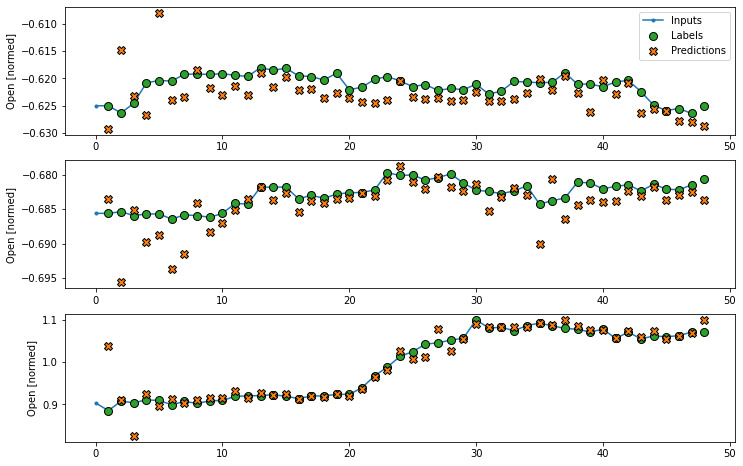

In [ ]:
w2.plot(rnn_s, plot_col='Open')

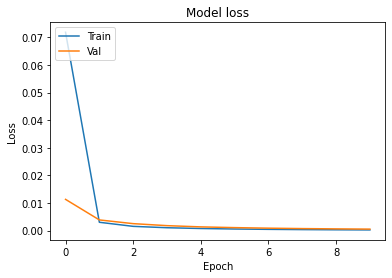

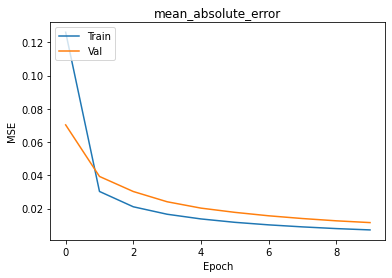

In [ ]:
plot_history(history)

##### Multiple Step predict

In [ ]:
rnn_m = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
history = compile_and_fit(rnn_m, w)

val_m['RNN'] = rnn_m.evaluate(w.val)
test_m['RNN'] = rnn_m.evaluate(w.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 10s 28ms/step - loss: 0.1547 - mean_absolute_error: 0.2024 - val_loss: 0.0394 - val_mean_absolute_error: 0.1371
Epoch 2/10
303/303 [==============================] - 9s 28ms/step - loss: 0.0104 - mean_absolute_error: 0.0608 - val_loss: 0.0169 - val_mean_absolute_error: 0.0933
Epoch 3/10
303/303 [==============================] - 9s 31ms/step - loss: 0.0066 - mean_absolute_error: 0.0485 - val_loss: 0.0135 - val_mean_absolute_error: 0.0849
Epoch 4/10
303/303 [==============================] - 9s 28ms/step - loss: 0.0059 - mean_absolute_error: 0.0456 - val_loss: 0.0120 - val_mean_absolute_error: 0.0797
Epoch 5/10
303/303 [==============================] - 9s 29ms/step - loss: 0.0055 - mean_absolute_error: 0.0437 - val_loss: 0.0112 - val_mean_absolute_error: 0.0765
Epoch 6/10
303/303 [==============================] - 9s 29ms/step - loss: 0.0053 - mean_absolute_error: 0.0425 - val_loss: 0.0106 - val_mean_absolute_error: 0.0747
Epoch 7/1

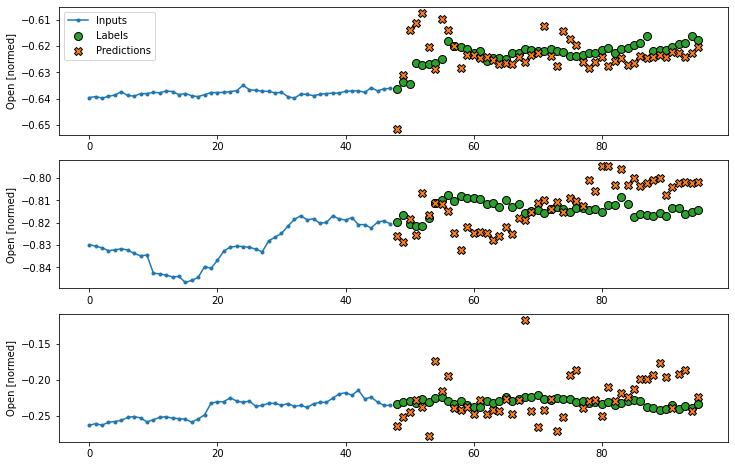

In [ ]:
w.plot(rnn_m, plot_col='Open')

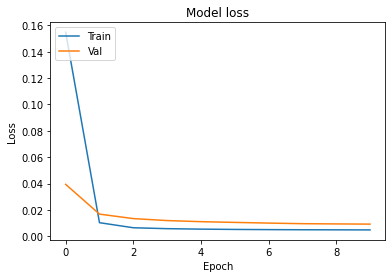

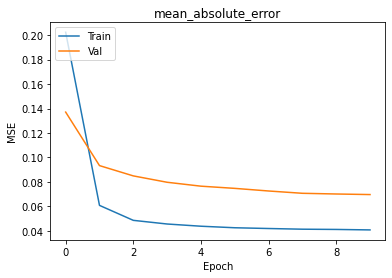

In [ ]:
plot_history(history)

### Part 2 - GRU & LSTM

For both GRU and LSTM, I did the same as RNN, just a
simple 1 layer NN, with the default tanh activation. The
evaluation metric is also the same as above.

Based on the evaluation (at the bottom of this section).
GRU and LSTM performs a lot better than RNN.
From the prediction graph compare to the real data, we
could also tell that RNN is off by a descent amount, 
while LSTM and GRU almost fit perfectly with single step.
Compare to RNN, LSTM abd GRU use memory cell to store 
activation value of previous value. 

For multiple step prediction, none of the types of RNN 
work for this dataset. Because the price change could not 
has so much variant and cannot be predicted. Otherwise, 
everyone who knows AI prediction would be rich.


### GRU

In [ ]:
gru_s = tf.keras.models.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
history = compile_and_fit(gru_s, w2)

val_s['GRU'] = gru_s.evaluate(w2.val)
test_s['GRU'] = gru_s.evaluate(w2.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 18s 50ms/step - loss: 0.0767 - mean_absolute_error: 0.1217 - val_loss: 0.0114 - val_mean_absolute_error: 0.0601
Epoch 2/10
303/303 [==============================] - 14s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0322 - val_loss: 0.0040 - val_mean_absolute_error: 0.0386
Epoch 3/10
303/303 [==============================] - 14s 47ms/step - loss: 0.0013 - mean_absolute_error: 0.0194 - val_loss: 0.0017 - val_mean_absolute_error: 0.0264
Epoch 4/10
303/303 [==============================] - 15s 48ms/step - loss: 5.2681e-04 - mean_absolute_error: 0.0131 - val_loss: 8.8680e-04 - val_mean_absolute_error: 0.0181
Epoch 5/10
303/303 [==============================] - 16s 51ms/step - loss: 2.6483e-04 - mean_absolute_error: 0.0096 - val_loss: 5.8334e-04 - val_mean_absolute_error: 0.0138
Epoch 6/10
303/303 [==============================] - 14s 47ms/step - loss: 1.7368e-04 - mean_absolute_error: 0.0077 - val_loss: 4.5384e-04 - val_mean_abs

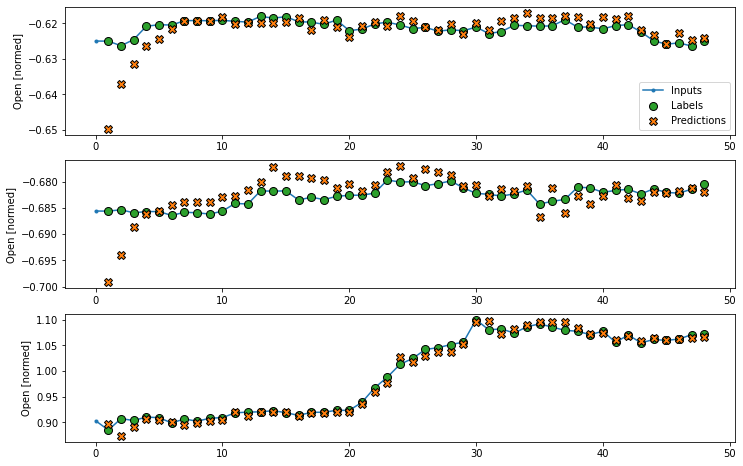

In [ ]:
w2.plot(gru_s, plot_col='Open')

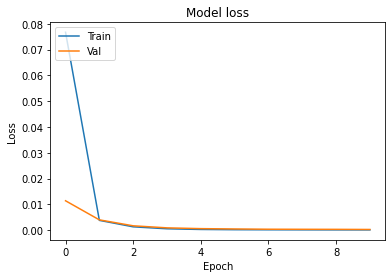

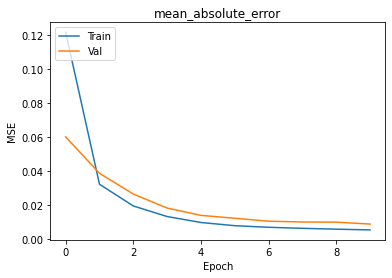

In [ ]:
plot_history(history)

##### Multiple Step Predict

In [ ]:
gru_m = tf.keras.models.Sequential([
    tf.keras.layers.GRU(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
history = compile_and_fit(gru_m, w)

val_m['GRU'] = gru_m.evaluate(w.val)
test_m['GRU'] = gru_m.evaluate(w.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 17s 47ms/step - loss: 0.0356 - mean_absolute_error: 0.0939 - val_loss: 0.0126 - val_mean_absolute_error: 0.0786
Epoch 2/10
303/303 [==============================] - 14s 45ms/step - loss: 0.0058 - mean_absolute_error: 0.0445 - val_loss: 0.0092 - val_mean_absolute_error: 0.0706
Epoch 3/10
303/303 [==============================] - 14s 46ms/step - loss: 0.0050 - mean_absolute_error: 0.0412 - val_loss: 0.0085 - val_mean_absolute_error: 0.0678
Epoch 4/10
303/303 [==============================] - 14s 45ms/step - loss: 0.0048 - mean_absolute_error: 0.0400 - val_loss: 0.0082 - val_mean_absolute_error: 0.0661
Epoch 5/10
303/303 [==============================] - 15s 49ms/step - loss: 0.0048 - mean_absolute_error: 0.0395 - val_loss: 0.0082 - val_mean_absolute_error: 0.0660
Epoch 6/10
303/303 [==============================] - 14s 45ms/step - loss: 0.0047 - mean_absolute_error: 0.0391 - val_loss: 0.0078 - val_mean_absolute_error: 0.0635
Epoc

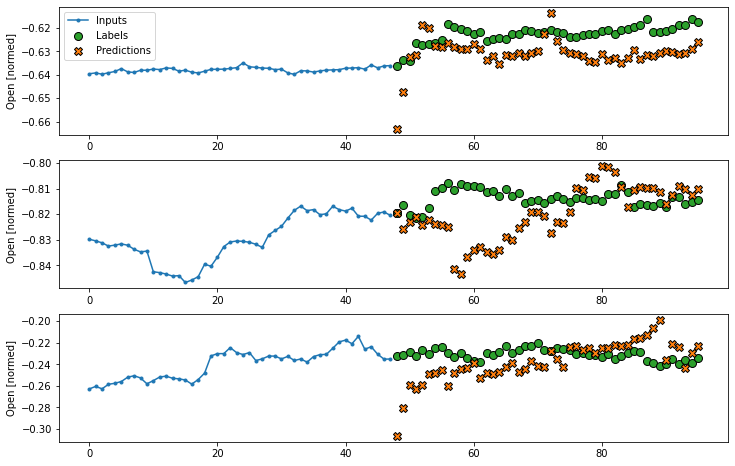

In [ ]:
w.plot(gru_m, plot_col='Open')

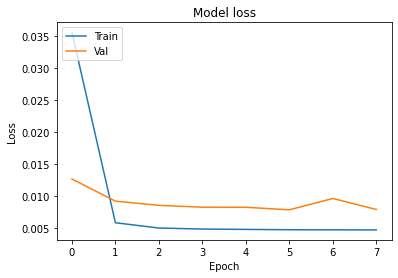

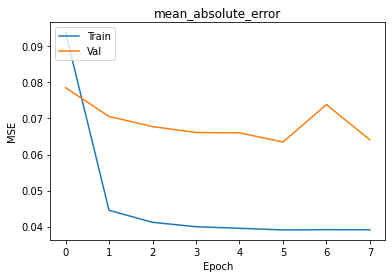

In [ ]:
plot_history(history)

### LSTM

In [ ]:
lstm_s = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
history = compile_and_fit(lstm_s, w2)

val_s['LSTM'] = lstm_s.evaluate(w2.val)
test_s['LSTM'] = lstm_s.evaluate(w2.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 17s 48ms/step - loss: 0.0430 - mean_absolute_error: 0.1092 - val_loss: 0.0207 - val_mean_absolute_error: 0.0739
Epoch 2/10
303/303 [==============================] - 14s 46ms/step - loss: 0.0062 - mean_absolute_error: 0.0333 - val_loss: 0.0073 - val_mean_absolute_error: 0.0364
Epoch 3/10
303/303 [==============================] - 14s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0215 - val_loss: 0.0032 - val_mean_absolute_error: 0.0238
Epoch 4/10
303/303 [==============================] - 14s 46ms/step - loss: 0.0013 - mean_absolute_error: 0.0157 - val_loss: 0.0015 - val_mean_absolute_error: 0.0176
Epoch 5/10
303/303 [==============================] - 14s 47ms/step - loss: 6.9063e-04 - mean_absolute_error: 0.0123 - val_loss: 8.2167e-04 - val_mean_absolute_error: 0.0140
Epoch 6/10
303/303 [==============================] - 15s 50ms/step - loss: 4.1590e-04 - mean_absolute_error: 0.0099 - val_loss: 5.3338e-04 - val_mean_absolute_er

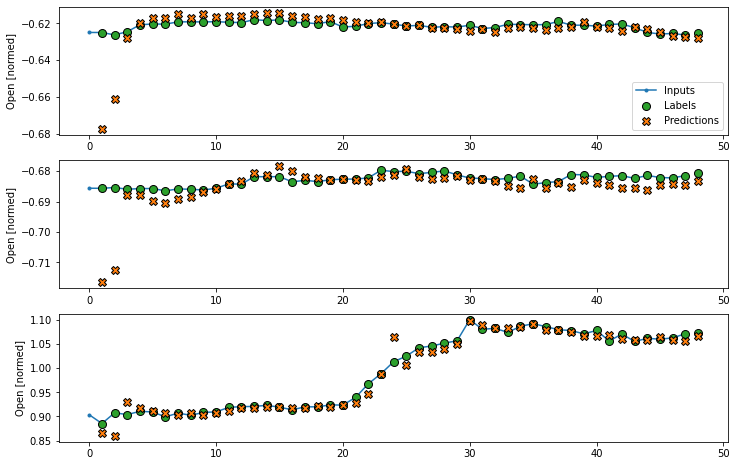

In [ ]:
w2.plot(lstm_s, plot_col='Open')

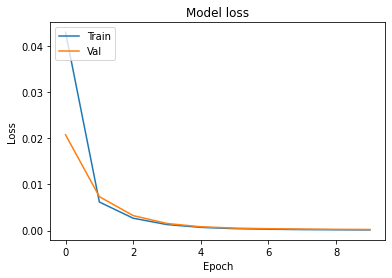

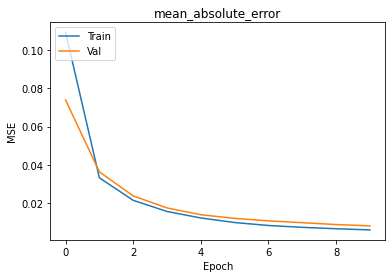

In [ ]:
plot_history(history)

#### Multiple Step Prediction

In [ ]:
lstm_m = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(1)
])

In [ ]:
history = compile_and_fit(lstm_m, w)

val_m['LSTM'] = lstm_m.evaluate(w.val)
test_m['LSTM'] = lstm_m.evaluate(w.test, verbose=0)

Epoch 1/10
303/303 [==============================] - 18s 50ms/step - loss: 0.0632 - mean_absolute_error: 0.1353 - val_loss: 0.0333 - val_mean_absolute_error: 0.1059
Epoch 2/10
303/303 [==============================] - 14s 47ms/step - loss: 0.0131 - mean_absolute_error: 0.0619 - val_loss: 0.0190 - val_mean_absolute_error: 0.0882
Epoch 3/10
303/303 [==============================] - 14s 47ms/step - loss: 0.0086 - mean_absolute_error: 0.0522 - val_loss: 0.0131 - val_mean_absolute_error: 0.0777
Epoch 4/10
303/303 [==============================] - 15s 48ms/step - loss: 0.0066 - mean_absolute_error: 0.0469 - val_loss: 0.0106 - val_mean_absolute_error: 0.0737
Epoch 5/10
303/303 [==============================] - 14s 47ms/step - loss: 0.0055 - mean_absolute_error: 0.0433 - val_loss: 0.0092 - val_mean_absolute_error: 0.0693
Epoch 6/10
303/303 [==============================] - 14s 47ms/step - loss: 0.0051 - mean_absolute_error: 0.0415 - val_loss: 0.0088 - val_mean_absolute_error: 0.0684
Epoc

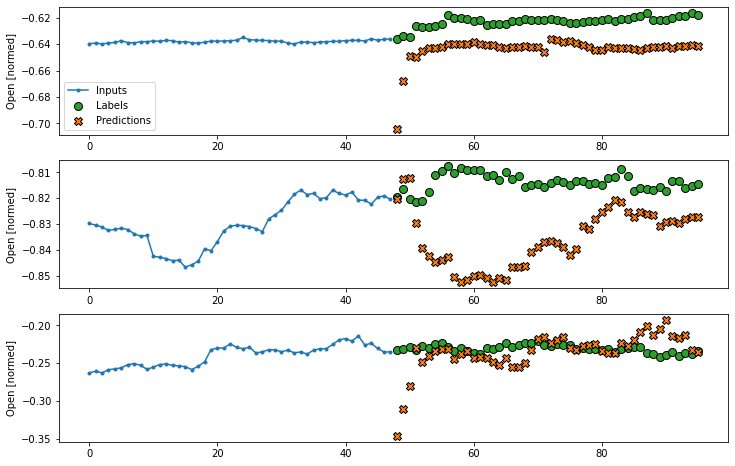

In [ ]:
w.plot(lstm_m, plot_col='Open')

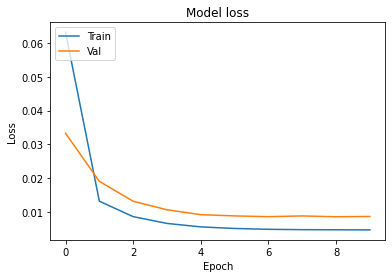

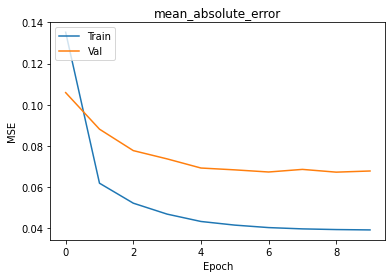

In [ ]:
plot_history(history)

In [ ]:
val_s

{'RNN': [0.0005154540995135903, 0.011581669561564922],
 'GRU': [0.0002607742208056152, 0.00870596244931221],
 'LSTM': [0.00023416934709530324, 0.008201402612030506]}

In [ ]:
val_m

{'RNN': [0.009300446137785912, 0.06963352113962173],
 'GRU': [0.007872170768678188, 0.06407471001148224],
 'LSTM': [0.008635700680315495, 0.06783714145421982]}

In [ ]:
test_s

{'RNN': [0.019549330696463585, 0.08149586617946625],
 'GRU': [0.004172839689999819, 0.043769337236881256],
 'LSTM': [0.006570414174348116, 0.046961523592472076]}

In [ ]:
test_m

{'RNN': [0.018077393993735313, 0.10766613483428955],
 'GRU': [0.005192956421524286, 0.05305926874279976],
 'LSTM': [0.007243909873068333, 0.06232188269495964]}

### Part 3 - Compare to FFNN
Traditional Feed-foward network could predict the problem to some
extent. While RNN model is using time stamp to keep track of the
previous information. FFNN is just trying to build an algorithm to
feed the dataset. Without the context of the previous element, the 
prediction will be less accurate. It is also difficult to do multiple
step prediction for FFNN compare to RNN, because of the lacking of
time stamp and information memorization.


# Task 2 - Word Embedding

The pre-trained model is from GloVe. I am using the 6B token, 400k vocab, 
uncased and 50 dimensions set.
https://nlp.stanford.edu/projects/glove/


In [ ]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

In [ ]:
glove_file = datapath('/content/glove.6B.50d.txt')
tmp = get_tmpfile('/content/w2vec.txt')

In [ ]:
_ = glove2word2vec(glove_file, tmp)

In [ ]:
model = KeyedVectors.load_word2vec_format(tmp)

In [ ]:
def cos_similarity(w1, w2):
  v1 = model[w1]
  v2 = model[w2]
  return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [ ]:
cos_similarity('apple', 'phone')

0.60054415

In [ ]:
cos_similarity('banana', 'apple')

0.56079286

In [ ]:
cos_similarity('chrome', 'edge')

0.28042358

In [ ]:
cos_similarity('king', 'queen')

0.7839044

In [ ]:
cos_similarity('apple', 'apple')

1.0

#### Dissimilarity
http://proceedings.mlr.press/v37/kusnerb15.pdf
> One such measure of word dissimilarity is naturally provided by
their Euclidean distance in the word2vec embedding space.

The dissimilarity is calculated based on Euclidean Distance of two 
words. When the two words are more farther apart in the model. It 
means they are less related, which means dissimilar.

In [ ]:
def dissimilarity(w1, w2):
    v1 = model[w1]
    v2 = model[w2]
    return np.linalg.norm(v1-v2)

In [ ]:
dissimilarity('apple', 'phone')

4.874689

In [ ]:
dissimilarity('apple', 'banana')

4.772058

In [ ]:
dissimilarity('chrome', 'edge')

5.5873995

In [ ]:
dissimilarity('king', 'queen')

3.4777563

In [ ]:
dissimilarity('apple', 'apple')

0.0

#### Read Input

In [ ]:
w1 = input("Enter word 1 => ").strip()
w2 = input("Enter word 2 => ").strip()
print(cos_similarity(w1, w2))
print(dissimilarity(w1, w2))

Enter word 1 => positive
Enter word 2 => negative
0.84412086
2.8832605
